# (Ford GoBike System Data)
## by (Ramy Heshmat)

## Investigation Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/remoo/OneDrive/Desktop/Vis Project/Project Template/201902-fordgobike-tripdata.csv')
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_hour_of_day,start_time_dayofweek,member_age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,...,4902,Customer,1984,Male,No,869.750000,14.495833,17,Thursday,35
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),...,5905,Customer,1972,Male,No,1030.900000,17.181667,12,Thursday,47
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,...,6638,Subscriber,1989,Other,No,608.166667,10.136111,17,Thursday,30
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,...,4898,Subscriber,1974,Male,Yes,26.416667,0.440278,23,Thursday,45
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,...,5200,Subscriber,1959,Male,No,29.883333,0.498056,23,Thursday,60


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
# setting the chart styles and the main color
sb.set_style('darkgrid')
color_base = sb.color_palette()[0]

In [4]:
%%HTML 
<script>
    function luc21893_refresh_cell(cell) {
        if( cell.luc21893 ) return;
        cell.luc21893 = true;
        console.debug('New code cell found...' );
        
        var div = document.createElement('DIV');            
        cell.parentNode.insertBefore( div, cell.nextSibling );
        div.style.textAlign = 'right';
        var a = document.createElement('A');
        div.appendChild(a);
        a.href='#'
        a.luc21893 = cell;
        a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

        cell.style.visibility='hidden';
        cell.style.position='absolute';
        a.innerHTML = '[show code]';        
                
    }
    function luc21893_refresh() {                
        if( document.querySelector('.code_cell .input') == null ) {            
            // it apeears that I am in a exported html
            // hide this code
            var codeCells = document.querySelectorAll('.jp-InputArea')
            codeCells[0].style.visibility = 'hidden';
            codeCells[0].style.position = 'absolute';                        
            for( var i = 1; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i].parentNode)
            }
            window.onload = luc21893_refresh;
        }                 
        else {
            // it apperas that I am in a jupyter editor
            var codeCells = document.querySelectorAll('.code_cell .input')
            for( var i = 0; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i])
            }            
            window.setTimeout( luc21893_refresh, 1000 )
        }        
    }
    
    function luc21893_toggle(a) {
        if( a.luc21893.style.visibility=='hidden' ) {
            a.luc21893.style.visibility='visible';        
            a.luc21893.style.position='';
            a.innerHTML = '[hide code]';
        }
        else {
            a.luc21893.style.visibility='hidden';        
            a.luc21893.style.position='absolute';
            a.innerHTML = '[show code]';
        }
    }
    
    luc21893_refresh()
</script>

## (Visualization 1)

> The first chart is rightly skewed and as the age is increased, the trip count is decreased.  
> The second scatter chart showing the relationship between the member age and the trip duration in mins as the age is increased the trip durtaion is decreased in a negative correlation and this is logic.

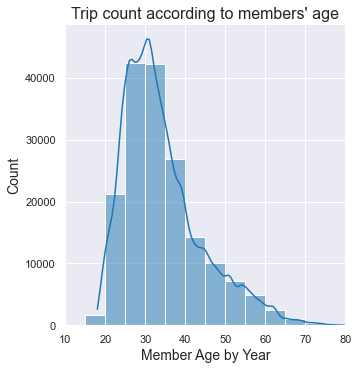

In [5]:
# plotting the member age in a histogram and kde
bins= np.arange(0, df['member_age'].max()+.1, 5)
sb.set(rc = {'figure.figsize':(20,10)})
sb.displot(df['member_age'], color= color_base, bins=bins, kde=True)
plt.xlim([10,80])
plt.xlabel('Member Age by Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Trip count according to members\' age', fontsize = 16);


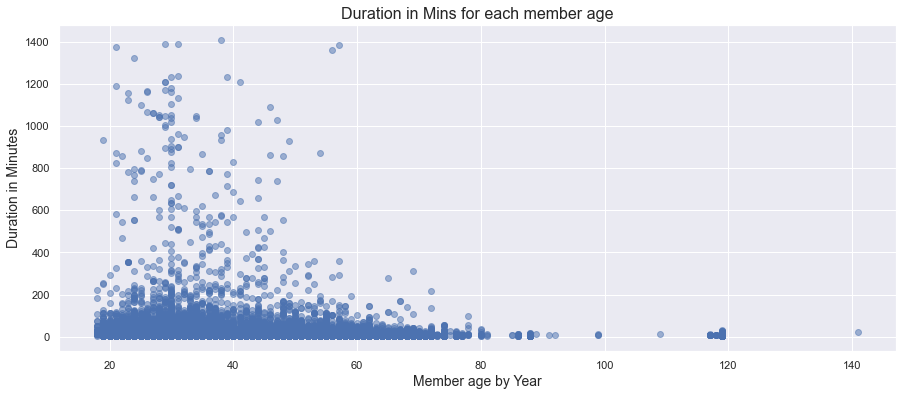

In [6]:
# plotting the relationship between the member age and the duration in minutes in a scatterplot
plt.figure(figsize =[15,6])
plt.scatter(data = df, x='member_age', y='duration_min', alpha = 0.5)
plt.xlabel('Member age by Year', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Duration in Mins for each member age' , fontsize = 16);

## (Visualization 2)

> This bar chart showing that 03 start hour at the morning of the day has the longest trip durations.  
>In the second chart Most of subscribers prefer Thursday for going on their bike trips.  
> The third chart is showing that the most of the users males and the rush starting hours of the day are 08 at the morning and 17 afternoon.

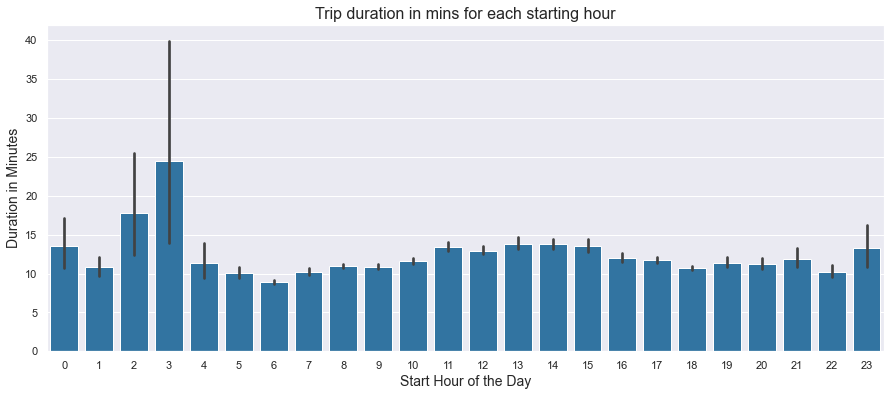

In [7]:
# plotting the relationship between the starting hour and the trip duration in mins in a bar chart
plt.figure(figsize = [15,6])
g = sb.barplot(data = df, x ='start_hour_of_day', y='duration_min', color= color_base)
plt.xlabel('Start Hour of the Day', fontsize = 14)
plt.ylabel('Duration in Minutes', fontsize = 14)
plt.title('Trip duration in mins for each starting hour', fontsize = 16);

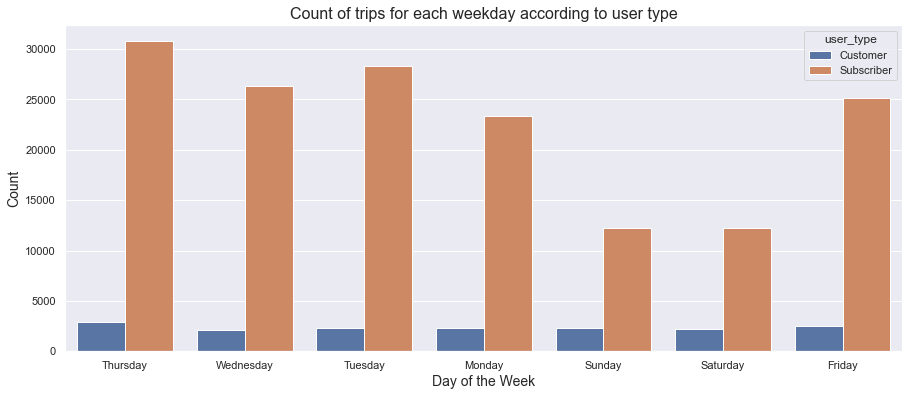

In [8]:
# plotting the count of trips for each user type in each day of the week
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_time_dayofweek', hue = 'user_type')
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Count of trips for each weekday according to user type', fontsize = 16);

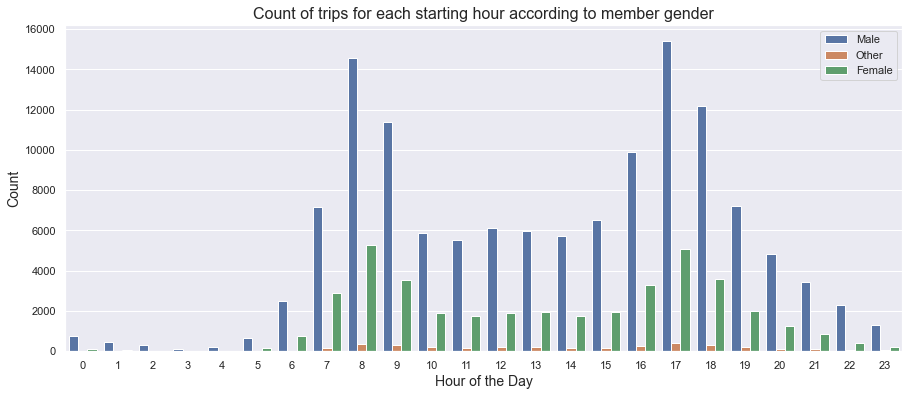

In [9]:
# plotting the count of the trips for each member gender in each starting hour of the day
plt.figure(figsize=[15,6])
g = sb.countplot(data = df, x = 'start_hour_of_day', hue = 'member_gender')
plt.xlabel('Hour of the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour according to member gender', fontsize = 16);

## (Visualization 3)

> The multivariate charts showing the trip counts are the most at Thursday at 08, 17 hours in the day, most of the users are male subscribers and the prefer the Thursday.

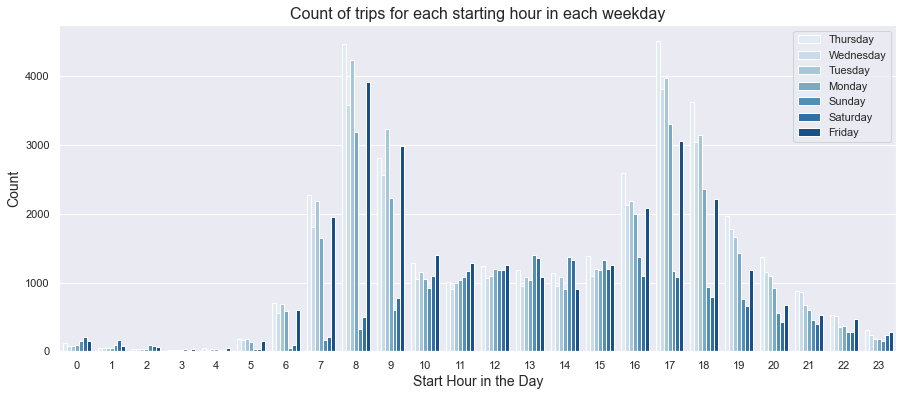

In [10]:
# plotting counts of multivariate varibles in subplots
plt.figure(figsize = [15, 6])
g = sb.countplot(data = df, x='start_hour_of_day', hue = 'start_time_dayofweek', palette = 'Blues')
plt.xlabel('Start Hour in the Day', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each starting hour in each weekday', fontsize = 16);

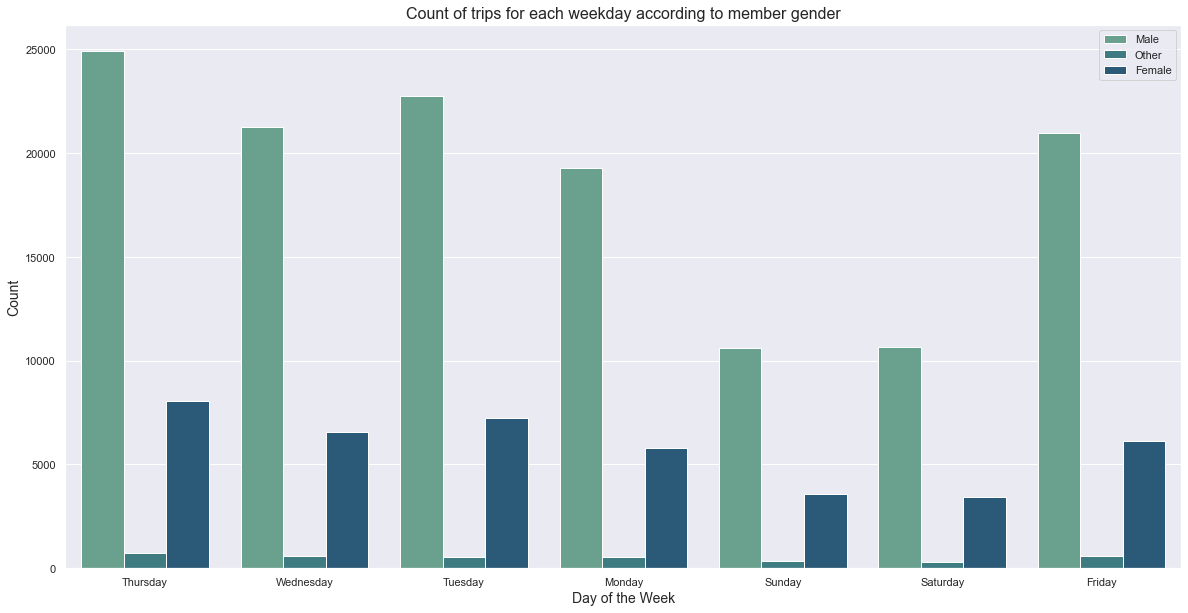

In [11]:

g = sb.countplot(data = df, x='start_time_dayofweek', hue ='member_gender', palette = "crest")
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'upper right')
plt.title('Count of trips for each weekday according to member gender', fontsize = 16);

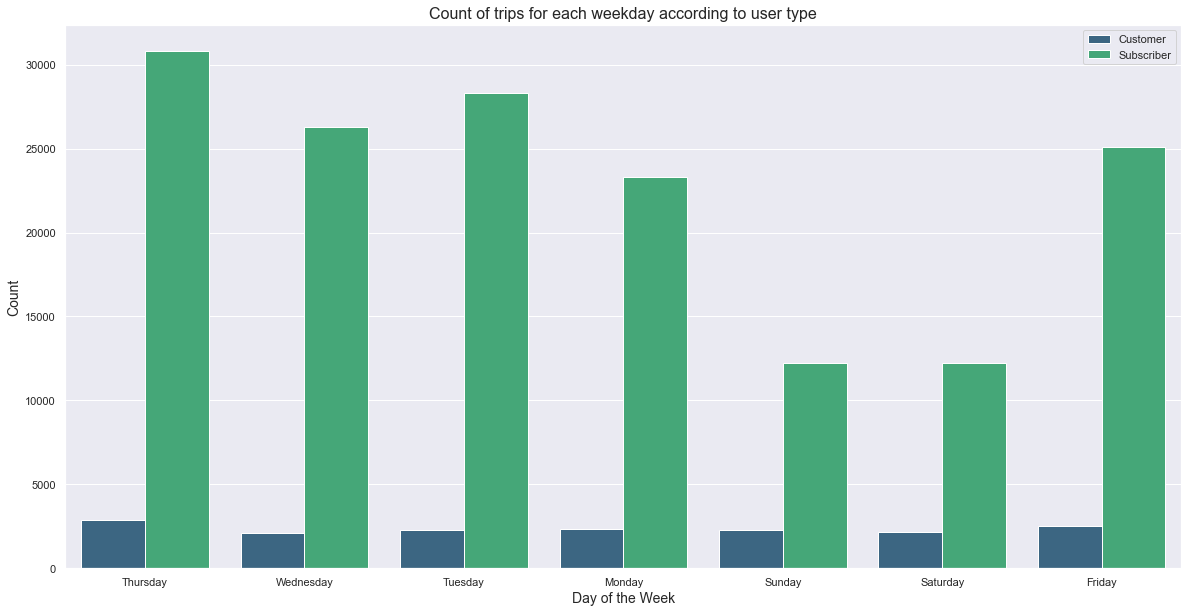

In [12]:
g = sb.countplot(data = df, x='start_time_dayofweek', hue ='user_type', palette = "viridis")
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend()
plt.title('Count of trips for each weekday according to user type', fontsize = 16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert presentation.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!